In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd   
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import optimizers , layers, applications
import seaborn as sns
sns.set_style('darkgrid')


In [ ]:
filenames = os.listdir("/content/drive/MyDrive/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

(565, 388, 3)


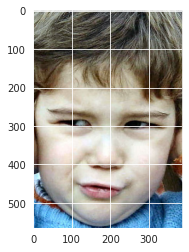

In [ ]:
fpath = "/content/drive/MyDrive/AutismDataset/test/Autistic.3.jpg"
img=plt.imread(fpath)
print (img.shape)
plt.imshow(img)

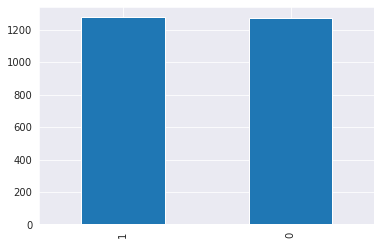

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
train_df.head()

,filename,category
0,Non_Autistic.192.jpg,0
1,Non_Autistic.1059.jpg,0
2,Autistic.911.jpg,1
3,Non_Autistic.1040.jpg,0
4,Autistic.970.jpg,1


In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
categories = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': categories
})

In [ ]:
test_df.head()

,filename,category
0,Autistic.34.jpg,1
1,Autistic.120.jpg,1
2,Autistic.49.jpg,1
3,Autistic.84.jpg,1
4,Autistic.82.jpg,1


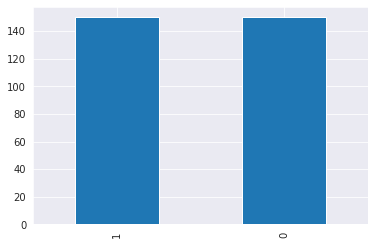

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
valid_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/valid")
categories = []
for filename in valid_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

valid_df = pd.DataFrame({
    'filename': valid_filenames,
    'category': categories
})

In [ ]:
valid_df.head()

,filename,category
0,Autistic. (45).jpg,1
1,Autistic. (27).jpg,1
2,Autistic. (38).jpg,1
3,Autistic. (17) (1).jpg,1
4,Autistic. (19) (1).jpg,1


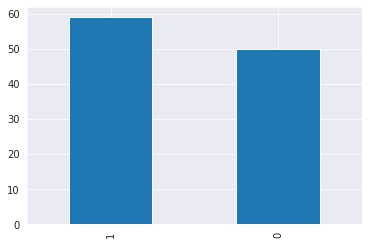

In [ ]:
valid_df['category'].value_counts().plot.bar()

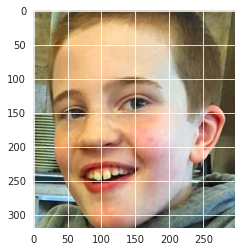

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/AutismDataset/train/"+sample)
plt.imshow(image)

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 40
batch_size = 64

pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final softmax layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest', 
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2291 validated image filenames belonging to 2 classes.


In [ ]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 255 validated image filenames belonging to 2 classes.


In [ ]:
#Fit Model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/40
35/35 [==============================] - 126s 3s/step - loss: 0.6971 - accuracy: 0.6008 - val_loss: 0.5083 - val_accuracy: 0.7240
Epoch 2/40
35/35 [==============================] - 67s 2s/step - loss: 0.5835 - accuracy: 0.7059 - val_loss: 0.5061 - val_accuracy: 0.7552
Epoch 3/40
35/35 [==============================] - 66s 2s/step - loss: 0.5159 - accuracy: 0.7494 - val_loss: 0.4512 - val_accuracy: 0.7969
Epoch 4/40
35/35 [==============================] - 66s 2s/step - loss: 0.4678 - accuracy: 0.7656 - val_loss: 0.4545 - val_accuracy: 0.7552
Epoch 5/40
35/35 [==============================] - 66s 2s/step - loss: 0.4378 - accuracy: 0.7948 - val_loss: 0.3736 - val_accuracy: 0.8229
Epoch 6/40
35/35 [==============================] - 66s 2s/step - loss: 0.4285 - accuracy: 0.8033 - val_loss: 0.3814 - val_accuracy: 0.8125
Epoch 7/40
35/35 [==============================] - 66s 2s/step - loss: 0.4243 - accuracy: 0.8047 - val_loss: 0.3844 - val_accuracy: 0.8177
Epoch 8/40
35/35 [=

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test: accuracy = 0.859375  ;  loss = 0.473023 


In [ ]:
model.save('vgg19.h5')

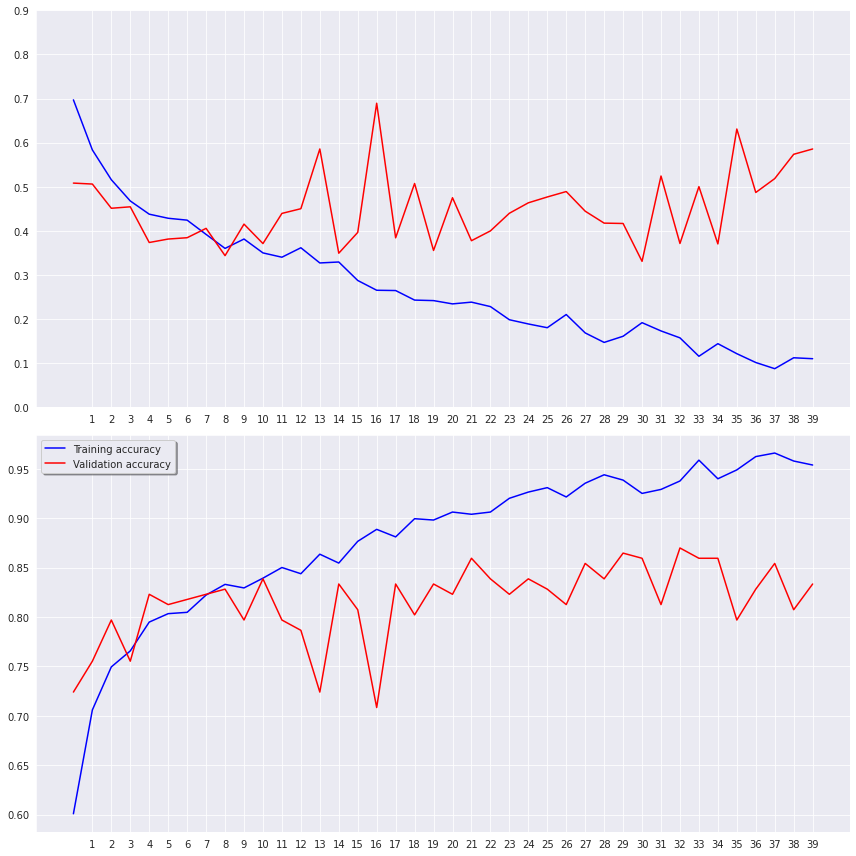

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/AutismDataset/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 300 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[9.54960942e-01, 4.50390950e-02],
       [5.30326320e-03, 9.94696736e-01],
       [7.80664325e-01, 2.19335720e-01],
       [4.24141139e-01, 5.75858831e-01],
       [4.52425964e-02, 9.54757392e-01],
       [8.05501547e-03, 9.91944969e-01],
       [2.62380749e-01, 7.37619221e-01],
       [5.71135730e-02, 9.42886472e-01],
       [4.16995436e-02, 9.58300471e-01],
       [1.33142993e-01, 8.66856992e-01],
       [6.83426142e-01, 3.16573858e-01],
       [9.95239854e-01, 4.76014661e-03],
       [4.82638143e-02, 9.51736152e-01],
       [6.49163648e-02, 9.35083628e-01],
       [5.12779632e-04, 9.99487162e-01],
       [5.33377845e-03, 9.94666219e-01],
       [3.18323463e-01, 6.81676567e-01],
       [4.33052744e-04, 9.99566972e-01],
       [1.35190681e-01, 8.64809334e-01],
       [5.33629391e-05, 9.99946594e-01],
       [2.43897326e-02, 9.75610256e-01],
       [8.92356992e-01, 1.07643001e-01],
       [4.70556915e-01, 5.29443085e-01],
       [5.72223775e-03, 9.94277775e-01],
       [4.107163

In [ ]:
test_filenames2 = os.listdir("/content/drive/MyDrive/Predictions")
test_df2 = pd.DataFrame({
    'filename': test_filenames2
})
nb_samples = test_df2.shape[0]

In [ ]:
test_gen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_gen2.flow_from_dataframe(
    test_df2, 
    "/content/drive/MyDrive/Predictions", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False
)

Found 18 validated image filenames.


In [ ]:
predict2 = model.predict_generator(test_generator2, steps=np.ceil(nb_samples/batch_size))
predict2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[1.0157490e-04, 9.9989843e-01],
       [4.0313620e-03, 9.9596870e-01],
       [3.7043025e-03, 9.9629575e-01],
       [1.2593756e-02, 9.8740619e-01],
       [9.9959320e-01, 4.0685362e-04],
       [1.3484297e-03, 9.9865156e-01],
       [9.8262697e-01, 1.7372960e-02],
       [8.7792265e-01, 1.2207731e-01],
       [9.5246458e-01, 4.7535431e-02],
       [9.9999893e-01, 1.0864433e-06],
       [9.7079247e-01, 2.9207550e-02],
       [9.9663407e-01, 3.3658990e-03],
       [9.9996698e-01, 3.2999535e-05],
       [9.9998808e-01, 1.1881580e-05],
       [3.0071041e-02, 9.6992892e-01],
       [2.1736942e-04, 9.9978262e-01],
       [7.9707435e-04, 9.9920291e-01],
       [4.3047741e-03, 9.9569523e-01]], dtype=float32)

In [ ]:
test_df2['category'] = np.argmax(predict2, axis=-1)
test_df2['category']

0     1
1     1
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
Name: category, dtype: int64

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df2['category'] = test_df2['category'].replace(label_map)
test_df2['category']

0     1
1     1
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
Name: category, dtype: object